# Discounting
## Intuition
Discounting comes up in some form in almost every class in an MBA program. It's a critical part of pricing, revenue estimation, and a whole host of other classes.

The idea behind it is simple, it's that things in the future have some sort of uncertainty inherent to them, so we are more likely to value things that are in the present. This rate of uncertainty can be based on something, or it can be arbitrary.

The intuition is that you can take values that are in the future and scale them by a factor so we can sum them up and use these figures to evaluate decisions.

## Explanation
### Terminology
First, we have a certain rate at which we discount things. We call this $r$. We can use this to create a discount factor which we use to weight things in the present. 

#### Discount Rate

$$
r
$$

#### Discount Factor

$$
\delta = \frac{ 1 } { 1 + r }
$$

### Multiple periods
Often, we'll use these across multiple periods. Let's assume a value $x_t$ which represents some number in some given period.

$$
\frac{ x_t }  { (1 + r)^t }
$$

What's important to note is (1) this is non-linear, (2) this is doesn't imply any relationship between $x_t$ and $x_{t+1}$.

### Summation
When this becomes very useful is when we sum discounting over multiple periods in order to get one number. This takes the following form:

$$
\sum_{t=0}^{T} \frac{ x_t }  { (1 + r_t)^t } = x_t \delta^t_t
$$

Now, assuming a constant rate over time, this becomes a geometric series. If we want to find the summation of it, we can derive it by conducting the following:

$$
\begin{align}
S_n &= x + x \delta^1 + x \delta^2 + \dots + x \delta ^{n-1} \\
\delta S_n &= \delta(x + x \delta^1 + x \delta^2 + \dots + x \delta ^{n-1})
\end{align}
$$

Now we can subtract the two 

$$
\begin{align}
S_n - \delta S_n &= x - x\delta^n \\
S_n(1 - \delta) &= x(1 - \delta^n) \\
S_n &= \frac{ x(1 - \delta^n) } { (1 - \delta) }
\end{align}
$$

### Perpetuity
This becomes very useful because we often want to calculate the value of a summation in perpetuity when $x$ is either (a) constant (b) linear such that $g \lt r$.
By taking the limit as $n$ approaches positive infinity, we get the following infinite summation formula:

$$
S_n = \frac{x} {1-\delta}
$$

Another way of expressing the derivation is as follows, where our starting term is $t=1$.

$$
\sum_{t=1}^{T} \frac{ x_t }  { (1 + r)^t }
$$

This means

$$
\begin{align}
S_n &= \frac{x}{1+r} + \frac{x}{(1+r)^2} + \frac{x}{(1+r)^3} + \dots \\
(1+r)S_n &= x + \frac{x}{(1+r)^2} + \frac{x}{(1+r)^3} + \dots \\
rS_n &= x \\
S_n &= \frac{x}{r}
\end{align} 
$$

### Special case: Growth & Discount
Let's assume that in addition to discounting every period, we also grow every period, such that $g < r$.

$$
\begin{align}
S_n &= \frac {x} {1+r} + \frac {x (1+g)} {(1+r)^2} + \frac {x (1+g)^2} {(1+r)^3} + \dots \\
\frac{1+r}{1+g} S_n &= \frac {x} {1+g} + \frac {x} {1+r} + \frac {x (1+g)} {(1+r)^2} + \dots
\end{align}
$$

Now, we can subtract off $S_n$ from both sides, which would leave us with the following

$$
\begin{align}
\frac{1+r}{1+g} S_n - S_n &= \frac {x} {1+g} \\
(1+r)S_n - (1+g)S_n &= x \\
S_n(1 + r - 1 - g) &= x \\
S_n &= \frac { x } { r - g }
\end{align}
$$


## Example
### Perpetuity
Let's assume we're making \$100 every year forever. Let's assume that we discount annually by 4\%. Let's assume this starts next year. that means, we'd have the following.

$$
\frac { 100 } { (1+0.04)^1 } + \frac { 100 } { (1+0.04)^2 } + \frac { 100 } { (1+0.04)^3 } + \dots
$$

The result would be $\frac{ 100 } { 0.04 } = 2500$.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


x = 100
T = 10000
r = 0.04

results = [ x  / (1 + r) ** t for t in range(1, T)]

Let's look at the first few hundred items

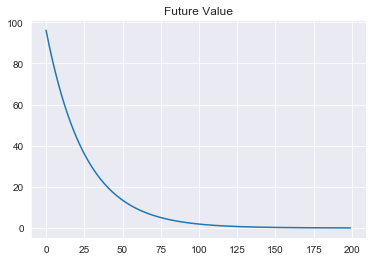

In [11]:
plt.plot(results[:200])
plt.title('Future Value')
plt.show()

Now, let's look at the solution.

In [17]:
print("Sum of results:\t\t", sum(results))
print("Analytic solution:\t", x / r)

Sum of results:		 2499.999999999991
Analytic solution:	 2500.0


### Special Case: Growth & Discount
Let's now assume that we get a 1\% increase annually.

In [23]:
g = 0.01

results2 = [ (x * (1 + g) ** (t - 1))  / (1 + r) ** t for t in range(1, T)]

print("Sum of results:\t\t", sum(results2))
print("Analytic solution:\t", x / (r - g))

Sum of results:		 3333.3333333333267
Analytic solution:	 3333.3333333333335
